# Chapter 4: Linear models

[Link to outline](https://docs.google.com/document/d/1fwep23-95U-w1QMPU31nOvUnUXE2X3s_Dbk5JuLlKAY/edit#heading=h.9etj7aw4al9w)

Concept map:
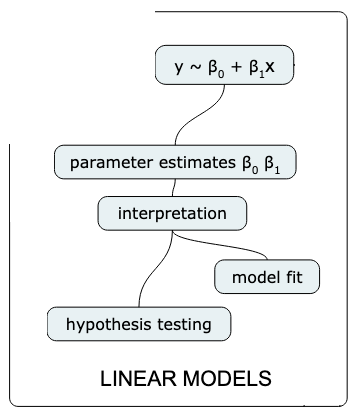

In [4]:
import numpy as np
import scipy as sp
import seaborn as sns
from scipy.stats import uniform, norm


# notebooks figs setup
%matplotlib inline
import matplotlib.pyplot as plt

# silence please; developers at work
import warnings
warnings.filterwarnings('ignore')

# Linear models

## Visually explain linear relationship between input and output

Different possible relationships between the number of hours of stats training and ELV gains:

![figures/ELV_as_function_of_stats_hours.png](figures/ELV_as_function_of_stats_hours.png)

